In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
train=pd.read_csv('Mercedes_train.csv')
test=pd.read_csv('Mercedes_test.csv')
df=pd.concat([train,test])
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Look for categorical variables
cat=[feature for feature in df.columns if df[feature].dtype=='O']
len(cat)

8

In [5]:
# Lets first drop Id column
df.drop('ID',axis=1,inplace=True)

In [6]:
# Check the no.of unique values of categorical features
for col in cat:
    print(col,':',df[col].nunique(),'Labels')

X0 : 53 Labels
X1 : 27 Labels
X2 : 50 Labels
X3 : 7 Labels
X4 : 4 Labels
X5 : 33 Labels
X6 : 12 Labels
X8 : 25 Labels


C:\Users\Tejus Modhe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Output variable')

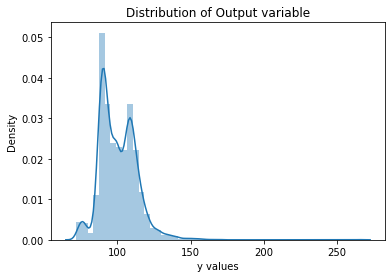

In [7]:
## Lets see the distribution of y variable
sns.distplot(df['y'].values,bins=50)
plt.xlabel('y values')
plt.title('Distribution of Output variable')

In [9]:
# Check for missing values
missing_vals=df.isnull().sum()
missing_vals[missing_vals>1]

y    4209
dtype: int64

In [10]:
## Apparently the test set file doesnt contain the y column therefore we shall proceed with train set
df['y'].isnull().sum()

4209

### Transforming categorical features with one-hot encoding

In [11]:
X=pd.get_dummies(train,columns=cat)

### Checking unique values per column

In [13]:
unique_vals_dict={}
for col in train.columns:
    if col not in ['ID''y','X0','X1','X2','X3','X4','X5','X6','X8']:
        unique_value=str(np.sort(train[col].unique()).tolist())
        tlist=unique_vals_dict.get(unique_value,[])
        tlist.append(col)
        unique_vals_dict[unique_value]=tlist[:]
for unique_values,columns in unique_vals_dict.items():
        print("Columns containing the unique values : ",unique_values)
        print(columns)

Columns containing the unique values :  [0, 6, 7, 9, 13, 18, 24, 25, 27, 30, 31, 32, 34, 36, 37, 38, 39, 40, 44, 47, 48, 49, 50, 52, 54, 60, 61, 62, 66, 67, 68, 70, 74, 75, 79, 80, 81, 86, 90, 92, 100, 102, 106, 107, 108, 109, 112, 116, 118, 119, 124, 125, 127, 128, 129, 130, 131, 133, 134, 136, 139, 141, 143, 145, 146, 147, 150, 151, 152, 153, 154, 158, 159, 160, 161, 164, 165, 166, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 184, 186, 190, 197, 200, 202, 203, 207, 208, 209, 212, 213, 214, 215, 217, 218, 222, 223, 224, 225, 229, 232, 233, 234, 237, 239, 240, 241, 246, 252, 255, 260, 261, 263, 264, 265, 268, 269, 270, 271, 274, 277, 278, 281, 282, 284, 286, 287, 294, 295, 300, 301, 302, 303, 308, 309, 310, 312, 315, 317, 318, 319, 320, 321, 322, 323, 325, 326, 328, 331, 332, 333, 334, 335, 336, 341, 342, 344, 348, 351, 355, 356, 359, 360, 361, 363, 369, 371, 372, 374, 375, 376, 379, 380, 381, 383, 385, 386, 387, 388, 389, 391, 394, 397, 398, 400, 401, 402, 403, 404, 405, 407, 411

In [14]:
X.shape

(4209, 565)

### Principal Componenets Analysis (PCA)

In [16]:
X.drop(['ID','y'],axis=1,inplace=True)

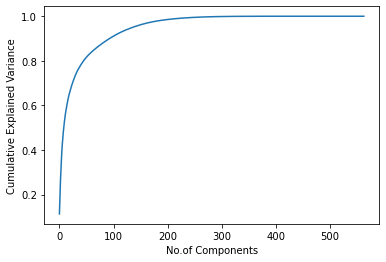

In [18]:
## Determining the number of components to be taken
pca=PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No.of Components')
plt.ylabel('Cumulative Explained Variance');

In [19]:
min(X.shape)

563

In [20]:
pca=PCA(n_components=200,svd_solver='arpack')
pca.fit(X)

PCA(n_components=200, svd_solver='arpack')

In [21]:
pca_dat= pca.transform(X)
pca_dat.shape

(4209, 200)

In [22]:
y=train['y']

In [23]:
y.shape

(4209,)

In [24]:
X.shape

(4209, 563)

### Truncated SVD

In [26]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

In [27]:
X_sparse=csr_matrix(X)
tsvd = TruncatedSVD(n_components=X_sparse.shape[1]-1)
X_tsvd = tsvd.fit(X)

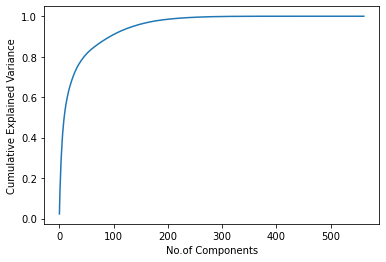

In [28]:
plt.plot(np.cumsum(tsvd.explained_variance_ratio_))
plt.xlabel('No.of Components')
plt.ylabel('Cumulative Explained Variance');

In [31]:
tsvd= TruncatedSVD(n_components=200)
tsvd.fit(X)
tsvd_dat= tsvd.transform(X)
tsvd_dat.shape

(4209, 200)

### Kernel PCA

In [32]:
from sklearn.decomposition import KernelPCA

In [33]:
ker_pca= KernelPCA(n_components=200,kernel='rbf')
ker_pca.fit(X)
ker_dat= ker_pca.transform(X)
ker_dat.shape

(4209, 200)

### Split Train Test Data

In [34]:
X_train1,X_test1,y_train1,y_test1=train_test_split(pca_dat,y,test_size=0.3)
X_train2,X_test2,y_train2,y_test2=train_test_split(tsvd_dat,y,test_size=0.3)
X_train3,X_test3,y_train3,y_test3=train_test_split(ker_dat,y,test_size=0.3)

### Regression Model Building

In [39]:
Regressors=[
    LinearRegression(),
    SVR(kernel='linear'),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

In [36]:
import time

#### Models on PCA reduced data

In [40]:
# Define function to input the train and test data and output the MSE scores for each technique
def mse_score(X_train,X_test,y_train,y_test):
    for regr in Regressors:
        s=time.time()
        regr.fit(X_train,y_train)
        y_pred= regr.predict(X_test)
        mse=mean_squared_error(y_pred,y_test)
        e=time.time()
        print(f"MSE: {round(mse,3)} \t Time(in secs): {round(e-s,3)} \t Regressor: {regr.__class__.__name__}")

In [41]:
mse_score(X_train1,X_test1,y_train1,y_test1)

MSE: 68.475 	 Time(in secs): 0.106 	 Regressor: LinearRegression
MSE: 71.359 	 Time(in secs): 4.061 	 Regressor: SVR
MSE: 87.799 	 Time(in secs): 129.452 	 Regressor: RandomForestRegressor
MSE: 78.842 	 Time(in secs): 39.132 	 Regressor: GradientBoostingRegressor


#### Models on Truncated SVD Data

In [42]:
mse_score(X_train2,X_test2,y_train2,y_test2)

MSE: 90.941 	 Time(in secs): 0.113 	 Regressor: LinearRegression
MSE: 94.997 	 Time(in secs): 4.657 	 Regressor: SVR
MSE: 97.888 	 Time(in secs): 115.063 	 Regressor: RandomForestRegressor
MSE: 98.354 	 Time(in secs): 40.078 	 Regressor: GradientBoostingRegressor


#### Models on Kernel PCA Data

In [43]:
mse_score(X_train3,X_test3,y_train3,y_test3)

MSE: 66.702 	 Time(in secs): 0.141 	 Regressor: LinearRegression
MSE: 88.933 	 Time(in secs): 3.42 	 Regressor: SVR
MSE: 73.206 	 Time(in secs): 123.999 	 Regressor: RandomForestRegressor
MSE: 70.994 	 Time(in secs): 38.576 	 Regressor: GradientBoostingRegressor
